# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

1. Number of unique listings = 45053
2. Number of unique hosts = 26286

In [2]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)
import pandas as pd
import numpy as np
from pandasql import sqldf

df_listings=pd.read_csv("listings.csv")
df_reviews=pd.read_csv("reviews.csv")
df_calendar=pd.read_csv("calendar.csv")
(len(df_listings.id),len(df_listings.host_id.unique()))

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45053, 26286)

In [34]:
df_listings.shape
#The listings dataframe has 106 columns which represents the attributes and other information about the house, 
#and it also has 45053 rows which represents 45053 houses which are located in LA and are listed on Uber during 
#a specific time.

(45053, 106)

In [35]:
df_reviews.shape
#The reviews dataframe has 6 columns which represents the attributes of the reviews of listinfs and also 
#has a 'id' column which can be linked to the 'listing id' column in the listing dataframe. The reviews 
#dataframe also has 1509564 rows which represents the listings that has been recorded by Uber during a 
#specific time.

(1509564, 6)

In [36]:
df_calendar.shape
#The calendar dataframe has 7 columns which represents the attributes of the calendar and also has a 'id' column 
#which can be linked to the 'listing id' column in the listing dataframe. The calendar dataframe also has 
#16444345 rows which represents the listings that has been recorded by Uber during a specific time.

#We put the data at the same location of the ipynb, and we found the data from website: insidearibnb.com.

(16444345, 8)

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

1. Mean of the number of listings per host in LA is 1.713954
2. Median of the number of listings per host in LA is 1
3. Standard deviation of the number of listings per host in LA is 2.999183
4. Minimum of the number of listings per host in LA is 1
5. Maximum of the number of listings per host in LA is 172

In [17]:
# You need to provide the code to answer the previous quesiton
#lph stands for list per host
df_lph=df_listings.groupby(by=["host_id"]).agg({"id":"count"})
df_lph.id.describe()
#mean:1.713954, median:1, standard deviation:2.999183, minimum:1, maximum:172

count    26286.000000
mean         1.713954
std          2.999183
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        172.000000
Name: id, dtype: float64

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

1. The average and standart deviation number of listing for a super host is 2.926276 and 3.177892
2. The average and standart deviation number of listing for a non-super host 1.671021 and 1.824264
3. Non-super hosts have more listings.

In [18]:
# You need to provide the code to answer the previous quesiton
df_listings["host_is_superhost"].unique() #f and t
df1=sqldf("select host_id,host_is_superhost,count(id) as total\
           from df_listings\
           group by host_id") #add number of listings of each host
del df1["host_id"] #delete host_id column

df1.groupby(by=["host_is_superhost"]).agg({"total":np.std})

,total
host_is_superhost,
f,2.926276
t,3.177892


In [20]:
df1.groupby(by=["host_is_superhost"]).agg({"total":np.mean})

,total
host_is_superhost,
f,1.671021
t,1.824264


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

(You need to write your answer in this markdown cell)

In [22]:
# You need to provide the code to answer the previous quesitondf_listings["host_verifications"].unique() 
unique = []
for i in (df_listings['host_verifications']):
    alltypes = i.strip('[').strip(']').strip(' ').split(', ')
    for j in alltypes:
        all_types = j.strip(' ').strip('\'')
        if j not in unique:
            unique.append(j)
len(unique)


22

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

Five most popular verification types: phone(99.68%), email(93,84%), reviews(68.85%), government_id(58.77%), jumio(43.34%)

In [28]:
df_5=sqldf("select distinct host_id, host_verifications from df_listings")
hvtype = {}
for i in (df_5['host_verifications']):
    alltypes = i.strip('[').strip(']').strip(' ').split(', ')
    for j in alltypes:
        all_types = j.strip(' ').strip('\'')
        if j not in hvtype:
            hvtype[j] = 1
        else:
            hvtype[j] += 1
hvtype_keys = [i for i in hvtype.keys()]
hvtype_values = [i for i in hvtype.values()]
df_Q5 = pd.DataFrame(columns = ['Verification','Amount'])
df_Q5['Verification'] = hvtype_keys
df_Q5['Amount'] = hvtype_values            
            
df_Q5['Percentage'] = df_Q5['Amount'].apply(lambda x:"{:.2%}".format(x/26286))            
df_Q5answer = sqldf('SELECT Verification,Amount,Percentage FROM df_Q5 ORDER BY AMOUNT DESC LIMIT 5')
df_Q5answer.head()            

,Verification,Amount,Percentage
0,'phone',26201,99.68%
1,'email',24666,93.84%
2,'reviews',18099,68.85%
3,'government_id',15448,58.77%
4,'jumio',11392,43.34%


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

1. The mean of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 is 216.9089123196462.
2. The standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 is 576.4146779077948.

In [4]:
#transform price->float
df_calendar["new_price"]=df_calendar[df_calendar.columns[3]].replace('[\$,]','',regex=True).astype(float)
#transform date to datetime type
df_calendar["date"]=pd.to_datetime(df_calendar["date"])

In [33]:
mask = (df_calendar['date'] >= '2020-1-1') & (df_calendar['date'] <= "2020-3-1")
df_date=df_calendar.loc[mask] #filter the date
df_date=df_date.loc[df_date.available=="t",]
df1=df_date.groupby(by=["listing_id"]).agg({"new_price":np.mean})
(df1.new_price.mean(),df1.new_price.std())

(254.77822712824755, 684.7550498988392)

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**
Jan 2016: 'great', 'stay', 'place', 'location', 'clean', 'house', 'us', 'nice', 'would', 'host'\
March 2017: 'great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host', 'house', 'comfortable'\
April 2018: 'great', 'place', 'stay', 'location', 'clean', 'would', 'host', 'nice', 'la', 'house'

In [2]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
def word_count(row,year,month,counts):
    if row['date'].split('-')[0] == year and row['date'].split('-')[1] == month:
        comment =  str(row['comments']).replace("’","").translate(str.maketrans('','',string.punctuation))\
                   .translate(str.maketrans('','','1234567890'))
        word_tokens = word_tokenize(comment.lower()) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        for word in filtered_sentence:
            if word in counts.keys():
                counts[word] += 1
            else:
                counts[word] = 1
    return counts
   

In [58]:
count= df_reviews.apply(word_count,args=('2016','01',{}),axis=1)  
df_counts = pd.DataFrame.from_dict(count[0],orient='index')
top_201601 = df_counts.sort_values(by=[0],ascending = False).head(10)
top_201601.index

Index(['great', 'stay', 'place', 'location', 'clean', 'house', 'us', 'nice',
       'would', 'host'],
      dtype='object')

In [3]:
count = df_reviews.apply(word_count,args=('2017','03',{}),axis=1)  
df_counts = pd.DataFrame.from_dict(count[0],orient='index')
top_201703 = df_counts.sort_values(by=[0],ascending = False).head(10)
top_201703.index

Index(['great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host',
       'house', 'comfortable'],
      dtype='object')

In [4]:
count = df_reviews.apply(word_count,args=('2018','04',{}),axis=1)  
df_counts = pd.DataFrame.from_dict(count[0],orient='index')
top_201804 = df_counts.sort_values(by=[0],ascending = False).head(10)
top_201804.index

Index(['great', 'place', 'stay', 'location', 'clean', 'would', 'host', 'nice',
       'la', 'house'],
      dtype='object')

### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

1. The five zipcode has the highest average listing price and has at least 30 listings are 90210, 90077, 93063, 90265, and 90069. 
2. And the price is 1963.557367, 1909.066130, 1567.562500, 1559.605010, and 998.113153.
3. The number of active listings and number of hosts of 90210 is 8402 and 173.
The number of active listings and number of hosts of 90077 is 2238 and 48.
The number of active listings and number of hosts of 93063 is 64 and 1.
The number of active listings and number of hosts of 90265 is 9861 and 221
The number of active listings and number of hosts of 90069 is 12461	and 305

In [54]:
# You need to provide the code to answer the previous quesiton
mask = (df_calendar['date'] >= '2020-1-1') & (df_calendar['date'] <= "2020-2-1")
df_1=df_calendar.loc[mask] #filter date
df_2=df_1.loc[df_1.available=="t",] #filter available

df_zipcode=df_2.merge(df_listings,how="left",left_on="listing_id",right_on="id")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [55]:
df_zipcode.head()#check

,listing_id,date,available,price,adjusted_price,minimum_nights_x,maximum_nights_x,new_price,id,listing_url,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,107970,2020-01-01,t,$77.00,$77.00,1,9,77.0,107970,https://www.airbnb.com/rooms/107970,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,6.53
1,107970,2020-01-02,t,$79.00,$79.00,1,9,79.0,107970,https://www.airbnb.com/rooms/107970,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,6.53
2,107970,2020-01-03,t,$77.00,$77.00,1,9,77.0,107970,https://www.airbnb.com/rooms/107970,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,6.53
3,107970,2020-01-04,t,$75.00,$75.00,1,9,75.0,107970,https://www.airbnb.com/rooms/107970,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,6.53
4,107970,2020-01-05,t,$68.00,$68.00,1,9,68.0,107970,https://www.airbnb.com/rooms/107970,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,6.53


In [56]:
df_result=sqldf("select zipcode, avg(new_price), count(id) as n_listings, count(distinct host_id) as n_host\
                 from df_zipcode\
                 group by zipcode\
                 having count(id) >= 30\
                 order by avg(new_price) desc limit 5")
df_result

,zipcode,avg(new_price),n_listings,n_host
0,90210,1963.557367,8402,173
1,90077,1909.066130,2238,48
2,93063,1567.562500,64,1
3,90265,1559.605010,9861,221
4,90069,998.113153,12461,305


### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

The five zipcodes have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays are 90265, 90046, 90034, 90803, and 90069.

In [3]:
df_Q9_calendar=df_calendar.filter(['date', 'available', 'listing_id',"new_price"],axis=1)

In [4]:
mask = (df_calendar['date'] >= '2020-1-1') & (df_calendar['date'] <= "2020-4-1")
df1=df_calendar.loc[mask]
df1["weektime"]=df1["date"].apply(lambda x: x.weekday_name)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df_zipcode1=df1.merge(df_listings,how="left",left_on="listing_id",right_on="id")
#add new column "weektime"——weekend/weekday
df_zipcode1["weektime"]=df_zipcode1["weektime"].apply(lambda x: "weekday" \
                                                      if x =="Monday" or x=="Tuesday" or x=="Wednesday" or x=="Thursday" or x=="Friday" \
                                                      else ( "weekend" if x=="Saturday" or x=="Sunday" else NA)) #一定要写else才能跑出来？太不智能了吧！


In [6]:
df_result_weekday=sqldf("select zipcode, weektime, count(distinct id) as n_listings, avg(new_price) as avg_D\
                  from df_zipcode1\
                  where weektime='weekday'\
                  group by zipcode\
                  having count(distinct id)>=30")

In [7]:
df_result_weekend=sqldf("select zipcode,weektime,count(distinct id) as n_listings, avg(new_price ) as avg_E\
                         from df_zipcode1\
                         where weektime= 'weekend'\
                         group by zipcode\
                         having count(distinct id)>=30")

In [8]:
df_result=df_result_weekday.merge(df_result_weekend,how="inner",on="zipcode")

In [9]:
df_result["abs_diff"]=abs(df_result["avg_E"]-df_result["avg_D"]) 
df_result.sort_values(by=["abs_diff"],ascending=False).head(5) 

,zipcode,weektime_x,n_listings_x,avg_D,weektime_y,n_listings_y,avg_E,abs_diff
19,90265,weekday,40,1007.405682,weekend,40,1023.432692,16.027010
13,90046,weekday,137,273.761004,weekend,137,281.310500,7.549496
7,90034,weekday,35,126.011255,weekend,35,131.267033,5.255778
25,90803,weekday,30,190.286364,weekend,30,195.038462,4.752098
18,90069,weekday,44,292.161157,weekend,44,295.509615,3.348458


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

1. The average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01 are 46995.22826086957 and 4980.64131556945 seperately. 
2. The average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01 are 124.11388367676463, 5.626010989539933

In [17]:
df_Q10_calendar=df_calendar.filter(['date', 'available', 'listing_id',"new_price"],axis=1)
df_Q10_listings=df_listings.filter(["id","beds"])

,id,beds
0,109,3.0
1,344,3.0
2,2708,1.0
3,2732,1.0
4,2864,1.0


In [18]:
mask = (df_Q10_calendar['date'] >= '2020-1-1') & (df_Q10_calendar['date'] <= "2020-4-1")
df1=df_Q10_calendar.loc[mask] #filter the date
df2 = df1.loc[df1.available == 't',]
df3 = df2.merge(df_Q10_listings, how = 'left', left_on = 'listing_id',right_on = 'id')
df_q10 = sqldf('SELECT sum(beds),sum(new_price),(sum(new_price)/sum(beds))as ppb, date FROM df3 GROUP BY date')
df_q10.head()


,sum(beds),sum(new_price),ppb,date
0,44519.0,6440037.0,144.658168,2020-01-01 00:00:00.000000
1,46206.0,6372372.0,137.912219,2020-01-02 00:00:00.000000
2,47415.0,6553989.0,138.226068,2020-01-03 00:00:00.000000
3,48256.0,6552515.0,135.786534,2020-01-04 00:00:00.000000
4,48660.0,6246612.0,128.372626,2020-01-05 00:00:00.000000


In [21]:
# You need to provide the code to answer the previous quesiton
(df_q10["sum(beds)"].mean(),df_q10["sum(beds)"].std(), df_q10.ppb.mean(),df_q10.ppb.std())

(46995.22826086957, 4980.64131556945, 124.11388367676463, 5.626010989539933)

## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:**
Please find the best 5 neighbourhoods based on total listing and average price at Airbnb Los Angeles from 2020-01-01 to 2020-04-01. 

**Question 2:**
For each host, Which listing has the highest review score with at least 50 reviews at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?

**Question 3:**
What type of house is the most popular at Airbnb? You should consider the number of bedrooms and bathrooms.

**Question 4:**
What kind of host is the highest scored at Airbnb?I You may need'host has profile pic'and 'host_identity_verified'.

**Question 5:**
Among all houses, which facility is most common?

In [ ]:
# Your code to answer Question 1
df_q11=mask = (df_calendar['date'] >= '2020-1-1') & (df_calendar['date'] <= "2020-4-1")
df11=df_calendar.loc[mask]
df_neigh=df11.merge(df_listings,how="left",left_on="listing_id",right_on="id")
df_q11_output = sqldf("select host_neighbourhood, count(id), avg(new_price) from df_neigh group by host_neighbourhood\
        order by count(id) desc, avg(new_price) asc limit 5")

In [ ]:
df_q11_output.head().plot(kind = "bar", x = "host_neighbourhood", y = "count(id)")

In [ ]:
# Your code to answer Question 2
df_q12=mask = (df_calendar['date'] >= '2020-1-1') & (df_calendar['date'] <= "2020-4-1")
df12=df_calendar.loc[mask]
number_of_review=50
df_score=df12.merge(df_listings,how="left",left_on="listing_id",right_on="id")
df_q12_output = sqldf("select review_scores_rating,host_id,listing_id from df_score where number_of_reviews > %s \
    group by host_id order by review_scores_rating desc limit 1" %number_of_review )

In [ ]:
df_q12_output.head().plot(kind = "bar", x = "host_neighbourhood", y = "count(id)")

In [30]:
# Your code to answer Question 3

df_Q13 = sqldf('SELECT count(id) as popular ,bedrooms, bathrooms \
               FROM df_listings group by bedrooms, bathrooms ORDER BY popular DESC')
df_Q13['type'] = 'bed'+df_Q13['bedrooms'].map(str)+' bath'+df_Q13['bathrooms'].map(str)
df_Q13.head(10)

,popular,bedrooms,bathrooms,type
0,22023,1.0,1.0,bed1.0 bath1.0
1,4677,0.0,1.0,bed0.0 bath1.0
2,3710,2.0,2.0,bed2.0 bath2.0
3,3174,2.0,1.0,bed2.0 bath1.0
4,1980,1.0,1.5,bed1.0 bath1.5
5,1687,3.0,2.0,bed3.0 bath2.0
6,1168,1.0,2.0,bed1.0 bath2.0
7,562,2.0,1.5,bed2.0 bath1.5
8,551,3.0,2.5,bed3.0 bath2.5
9,525,3.0,3.0,bed3.0 bath3.0


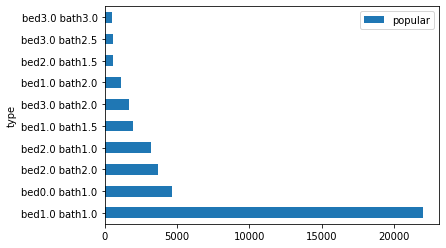

In [31]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots() 

df_Q13.head(10).plot(kind = 'barh', y = "popular", x= "type", ax= ax)

In [39]:
# Your code to answer Question 4



df_Q14 = sqldf('SELECT avg(review_scores_rating),host_has_profile_pic,host_identity_verified from df_listings group by host_has_profile_pic,host_identity_verified')
df_Q14

,avg(review_scores_rating),host_has_profile_pic,host_identity_verified
0,91.250000,None,None
1,92.617647,f,f
2,98.500000,f,t
3,93.823131,t,f
4,94.744039,t,t


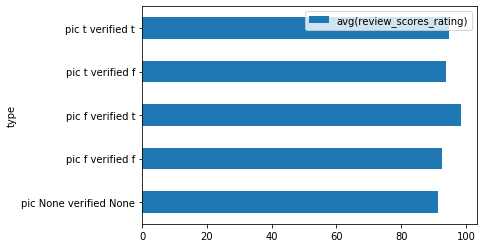

In [38]:
df_Q14['type'] = 'pic '+df_Q14['host_has_profile_pic'].map(str)+' verified '+df_Q14['host_identity_verified'].map(str)
                                                                                    
df_Q14.plot(kind = 'barh', y = "avg(review_scores_rating)", x= "type")                                                                            

In [ ]:
# Your code to answer Question 5
alltypes = []
atype = {}
for i in (df_listings['amenities']):
    alltypes+=i.strip('{').strip('}').split(',')
    for j in alltypes:
        if j not in atype:
            atype[j] = 1
        else:
            atype[j] += 1


atype_keys = [i for i in atype.keys()]
atype_values = [i for i in atype.values()]
df_Q15 = pd.DataFrame(columns = ['amenities','Amount'])
df_Q15['amenities'] = atype_keys
df_Q15['Amount'] = atype_values


In [ ]:

sum = df_Q15['Amount'].sum()
df_Q15['Percentage'] = df_Q15['Amount'].apply(lambda x:"{:.2%}".format(x/sum))

df_Q15answer = sqldf('SELECT amenities,Amount,Percentage FROM df_Q15 ORDER BY AMOUNT DESC LIMIT 5')
df_Q15answer.head()

In [ ]:
df_Q15.plot(kind = 'barh', y = "Amount", x= "amenities")   

## Executive Summary
For question 1, we think an excellent way to evaluate a host’ neighborhood is to have a higher total listing and lower average price. And our result finds that there is a huge between the best host neighborhood and the second one, let it alone the other host neighborhoods. So we think this neighborhood should decrease their price, this increasing the booking ratio. 

For question 2, we define the most popular listing as the one with highest review score. To be cautious, we exclude listing less than 50 reviews. And we find the most popular listing successfully.

For question 3, we classify the houses listed on Uber by dividing the number of bedrooms and bathrooms. According to the research, we can see that the One Bedroom One Bathroom is the most popular type. In order to illustrate, we pick the top 10 types of house. We can see that these popular type have no more than 3 bedrooms and 3 bathrooms. In the future, we will encourage more houses with one bedroom and one bathroom to be listed.

For question 4, we presumed that the hosts who have the most sufficient profile will have the highest score, but the reality seems that this is not the case. Hosts who have verified their profile and do not have a picture on their profile has the highest score. In order to help hosts’ houses to gain popularity, we may encourage the hosts not to use their personal picture on the profile.

For question 5, we get the conclusion that the most important amenity is WIFI, so we will encourage the houses without WIFI to get one in order to make sure the house will not lose customer for the reason that there is no WIFI.
